In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from xgboost import XGBRegressor

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn import metrics

In [ ]:
df=pd.read_csv('Train.csv')

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


LABEL ENCODER

In [ ]:
label_encoder=LabelEncoder()

In [ ]:
labels=label_encoder.fit_transform(df.Item_Fat_Content)

In [ ]:
df['Fat_Content']=labels

In [ ]:
df=df.drop('Item_Fat_Content', axis=1)

In [ ]:
label_encoder1=LabelEncoder()

In [ ]:
labels1=label_encoder1.fit_transform(df.Outlet_Size)

In [ ]:
df['outlet_size']=labels1

In [ ]:
df=df.drop('Outlet_Size',axis=1)

In [ ]:
label_encoder2=LabelEncoder()

In [ ]:
labels2=label_encoder2.fit_transform(df.Outlet_Location_Type)

In [ ]:
df['location_type']=labels2

In [ ]:
df=df.drop('Outlet_Location_Type',axis=1)

In [ ]:
label_encoder3=LabelEncoder()

In [ ]:
labels3=label_encoder3.fit_transform(df.Outlet_Type)

In [ ]:
df['outlet_type']=labels3

In [ ]:
df=df.drop('Outlet_Type',axis=1)

In [ ]:
label_encoder4=LabelEncoder()

In [ ]:
labels4=label_encoder4.fit_transform(df.Item_Type)

In [ ]:
df['item_type']=labels4

In [ ]:
df=df.drop('Item_Type',axis=1)

In [ ]:
label_encoder5=LabelEncoder()

In [ ]:
labels5=label_encoder5.fit_transform(df.Item_Outlet_Sales)

In [ ]:
df['Target']=labels5

In [ ]:
df=df.drop('Item_Outlet_Sales',axis=1)

In [ ]:
label_encoder6=LabelEncoder()

In [ ]:
labels6=label_encoder6.fit_transform(df.Outlet_Identifier)

In [ ]:
df['Identifier']=labels6

In [ ]:
df=df.drop('Outlet_Identifier',axis=1)

In [ ]:
label_encoder7=LabelEncoder()

In [ ]:
labels7=label_encoder7.fit_transform(df.Item_Identifier)

In [ ]:
df['ITEM_Identifier']=labels7

In [ ]:
df=df.drop('Item_Identifier',axis=1)

In [ ]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Fat_Content,outlet_size,location_type,outlet_type,item_type,Target,Identifier,ITEM_Identifier
0,9.30,0.016047,249.8092,1999,1,1,0,1,4,2540,9,156
1,5.92,0.019278,48.2692,2009,2,1,2,2,14,422,3,8
2,17.50,0.016760,141.6180,1999,1,1,0,1,10,1639,9,662
3,19.20,0.000000,182.0950,1998,2,3,2,0,6,670,0,1121
4,8.93,0.000000,53.8614,1987,1,0,2,1,9,865,1,1297


In [ ]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Fat_Content,outlet_size,location_type,outlet_type,item_type,Target,Identifier,ITEM_Identifier
0,9.300,0.016047,249.8092,1999,1,1,0,1,4,2540,9,156
1,5.920,0.019278,48.2692,2009,2,1,2,2,14,422,3,8
2,17.500,0.016760,141.6180,1999,1,1,0,1,10,1639,9,662
3,19.200,0.000000,182.0950,1998,2,3,2,0,6,670,0,1121
4,8.930,0.000000,53.8614,1987,1,0,2,1,9,865,1,1297
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,1,0,2,1,13,2047,1,370
8519,8.380,0.046982,108.1570,2002,2,3,1,1,0,516,7,897
8520,10.600,0.035186,85.1224,2004,1,2,1,1,8,1018,6,1357
8521,7.210,0.145221,103.1332,2009,2,1,2,2,13,1466,3,681


HANDLING MISSING VALUES

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Fat_Content                8523 non-null   int64  
 5   outlet_size                8523 non-null   int64  
 6   location_type              8523 non-null   int64  
 7   outlet_type                8523 non-null   int64  
 8   item_type                  8523 non-null   int64  
 9   Target                     8523 non-null   int64  
 10  Identifier                 8523 non-null   int64  
 11  ITEM_Identifier            8523 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 799.2 KB


In [ ]:
df.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Fat_Content                  0
outlet_size                  0
location_type                0
outlet_type                  0
item_type                    0
Target                       0
Identifier                   0
ITEM_Identifier              0
dtype: int64

In [ ]:
df['Item_Weight'].mean()

12.857645184135976

In [ ]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Fat_Content                  0
outlet_size                  0
location_type                0
outlet_type                  0
item_type                    0
Target                       0
Identifier                   0
ITEM_Identifier              0
dtype: int64

In [ ]:
df.shape

(8523, 12)

NUMERICAL FEATURES

In [ ]:
sns.set()

In [ ]:
plt.figure(figsize=(6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<ipython-input-195-87f1625d5e64>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


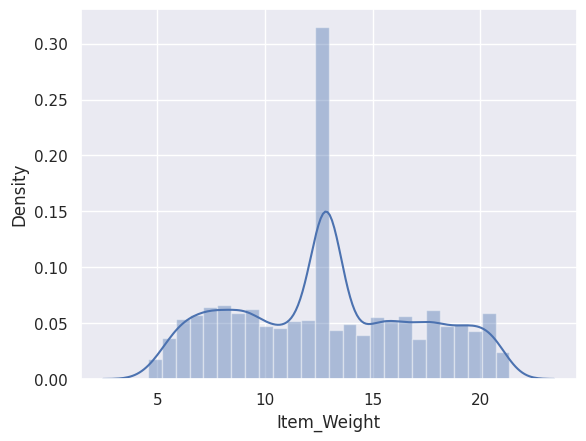

In [ ]:
sns.distplot(df['Item_Weight'])
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

<ipython-input-196-585a8160a051>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['Target'])
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Fat_Content', data=df)
plt.show()

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x='item_type', data=df)
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='outlet_size', data=df)
plt.show()

In [ ]:
df['Fat_Content'].value_counts()

In [ ]:
df.replace({'Fat_Content':{0:1,3:1,4:2}},inplace=True)

In [ ]:
df['Fat_Content'].value_counts()

Splitting features and Target

In [ ]:
X=df.drop(columns='Target',axis=1)

In [ ]:
Y=df['Target']

In [ ]:
print(X)

Splitting the data into Training data & Testing Data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

XGBOOST REGRESSOR

In [ ]:
regressor=XGBRegressor()

In [ ]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
X_train_predict=regressor.predict(X_train)

In [ ]:
r2_train = metrics.r2_score(Y_train, X_train_predict)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.8807797519475825


In [ ]:
X_test_predict = regressor.predict(X_test)

In [ ]:
r2_test = metrics.r2_score(Y_test, X_test_predict)

In [ ]:
print('R Squared value = ', r2_test)

R Squared value =  0.5892572172841366
